# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi news.
Outline of the exercise:
* Dataset preparation
* Preprocessing
* Exploration
* Word Collections

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Please enter your name below:
# Name: Mohammad Mehdi Zare
# Student Number: 

# Section 1: Dataset prepartition
This section you need to download [dataset](https://drive.google.com/file/d/1bRxHQDzPr6wDimbM7b89H47kH8O3YV8Y/view?usp=sharing) in a directory you work. After that run the below cell to untar the datase.

**Note 1: Don't change the below command.**

**Note 2: If you use Windows OS, unzip the dataset manually.**

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [ ]:
# !pip install arabic_reshaper
# !pip install wordcloud
# !pip install wordcloud_fa
# !pip install python_bidi
# !pip install bokeh
# !pip install hazm
# ! pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

23/12/20 13:32:49 WARN Utils: Your hostname, mojtaba resolves to a loopback address: 127.0.1.1; using 172.17.103.234 instead (on interface wlo1)
23/12/20 13:32:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/20 13:32:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [ ]:
# unzip data
# !tar -xzvf "/content/drive/MyDrive/big data/data.tar.gz" -C "/content/drive/MyDrive/big data/"

# Reading the data

In [ ]:
news_rdd = sc.textFile("news_data.jsonl")

# news_rdd=sc.parallelize(news_rdd.takeSample(False, 200000, 12))
# news_rdd.count()

# Section 2: Preprocessing
This section we try to normalize news and remove useless characters (for example /n and /u200c and ...). Also find and remove stop words.

In [ ]:
# import neccesary packages here
import json
import string
from math import log10
from hazm.utils import stopwords_list
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [ ]:
news_rdd1= news_rdd
json_rdd = news_rdd1.map(lambda x : json.loads(x))


In [ ]:
# ###          save and load data

# json_rdd = json_rdd.map(json.dumps)

# # reduce to one big string with one json on each line
# json_string = json_rdd.reduce(lambda x, y: x + "\n" + y)

# # write your string to a file
# with open("/content/drive/MyDrive/big data/news_data1.json", "w") as f:
    # f.write(json_string)
# n = sc.textFile("/content/drive/MyDrive/big data/sample.json")
# j = n.map(lambda x : json.loads(x))

# j.take(1)

In [ ]:

def remove_punc(x):
    punks = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~1234567890۱۲۳۴۵۶۷۸۹۰،؛'
    no_punc = x
    for ch in punks:
      no_punc = no_punc.replace(ch , " ")
    return no_punc.replace("\n" , "").replace("\u200c" , " ")

def remove_stopwords(rdd):
  stopwords = stopwords_list()
  rdd=rdd.replace("های", "").replace("میشود", " ")
  rdd = rdd.split()
  result = [word for word in rdd if not word in stopwords]
  return ' '.join(result)

def clean_rdd_util(T , function):
  T['body'] = function(T['body'])
  T['title'] = T['title'].replace("\u200c", " ")
  if "keywords" in T:
    T['keywords']= [function(x) for x in T['keywords']]
  else:
      T['keywords']=[]
  return T


def cleaning(rdd):
  rdd = rdd.map(lambda x: clean_rdd_util(x , remove_punc))
  rdd = rdd.map(lambda x: clean_rdd_util(x, remove_stopwords))
  return rdd;

In [ ]:
# json_rdd.take(1)

In [ ]:
cleaned= cleaning(json_rdd)

In [ ]:
cleaned.take(1)

[{'body': 'سرمربی ملوان تصاویر وایرالی دیدار نساجی پست جالب منتشر گزارش ورزش مهدی تارتار خوشحالی عجیب غریب دقیقه چهره جالب هفته لیگ برتر اختصاص موردتوجه هواداران فوتبال قرار تارتار انتشار پست اینستاگرامی تصاویر جشن خوشحالی نوشته جادوی طرفداران انزلی سرمربی ملوان وعده تیمش ادامه فصل توان خواهد جنگید رضایت هواداران جلب نوشته ادامه میخوانید عکسها نگاه میکنم متحیر میشوم یادم نمیآید هرگز اینطور شوری باشم جادوی شماست سکو آنچنان حس انرژی میدهید لحظه پیروزی برایمان وصفناشدنی سکوها لب خط پای تلویزیونها مستطیل سبز همدل یکصدا میرویم باهم میجنگیم باهم میخندیم هرروز تلاش میکنیم خنده صورت نگه پیروزی شماست مردان نیک چمن مردمان نیک سکو \U0001fa75🤍',
  'image_title_url': 'https://news-cdn.varzesh3.com/pictures/2023/08/09/A/a5l2b23f.jpg',
  'language': 'fa',
  'source': 'ورزش سه',
  'title': 'نوشته خاص تارتار برای لحظه جنجالی (عکس)',
  'date_published': 1696909606,
  'uid': '68feae4bbbedc2d54adbb2369',
  'url': 'https://www.varzesh3.com/news/1971626/%D9%86%D9%88%D8%B4%D8%AA%D9%87-%D8%AE%D8%A7%D8%B5-%D8%

In [ ]:
"""
TODO
Step 1: Remove useless charachters.
Step 2: Find and Remove stop words.
"""

# clean_news_rdd = ... #TODO: remove useless charachters
# processed_news_rdd = ... #TODO: find and remove stopwords.

'\nTODO\nStep 1: Remove useless charachters.\nStep 2: Find and Remove stop words.\n'

# Section 3: Exploration
Please answer the following questions regarding the dataset:
- what are the titles and urls of 5 longest news?
- what are the 20 most frequent words? (Plot the distribution of these words)
- find the `word clouds` of the news.
    - you need to use `keywords` field.
    - score = $2^{log_{10}(count)}$ ( count is the number of the each keyword)
    - you should normalize scores.
    - use ***wordcloud*** package for showing the result.
- plot a timeline which shows total count of news per each day.
- plot a timeline which shows total count of news per each day that have at least one of the word clouds.
- what is your inference about the below timeline.

In [ ]:
# TODO: find the answers of the above questions.
# p1

longest = cleaned.map(lambda x: ( len(x['body']) , (x['url'] , x['title'])))


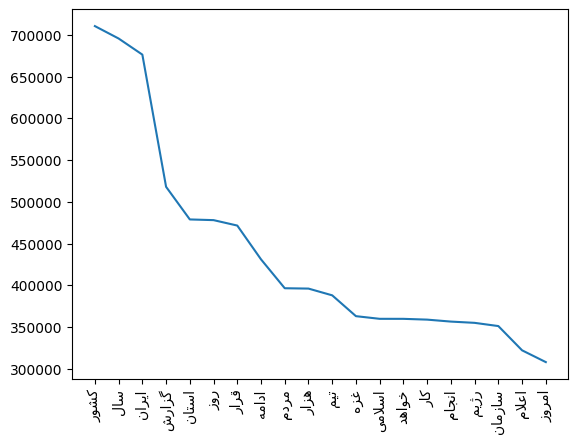

In [ ]:
# p2
support1=50000

most_frequent = cleaned.map(lambda x: x['body']).flatMap(lambda x: x.split()).map(lambda x: (x , 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (x[1] , x[0])).filter(lambda x : x[0]>support1)

t=most_frequent.top(20)
indices = np.arange(len(t))
counts = [x[0] for x in t]
words = [get_display(reshape(x[1])) for x in t]

plt.plot(words,counts)
plt.xticks(indices, words, rotation='vertical')
plt.show()

In [ ]:
# p3  how handle?? for each key word
# most frequent item Set algorithm (A prior) :

support2=10000
support3=2000

def filter_pass_1(keyword, frequent_items):
  keyword_splited= keyword.split()
  for word in keyword_splited:
    if word not in frequent_items:
      return False
  return True



frequent_items= dict(most_frequent.map(lambda x: (x[1] , x[0])).collect())
C= cleaned.flatMap(lambda x : x['keywords']).distinct().filter(lambda x: filter_pass_1(x, frequent_items)).map(lambda x: ([(frequent_items[y],y) for y in x.split()],x))

itemCandidate = C.filter(lambda x: len(x[0])==1)
pairCandidate = C.filter(lambda x: len(x[0])==2)
tripleCandidate = C.filter(lambda x: len(x[0])==3)


In [ ]:
pairCandidate.take(1)

[([(129336, 'دستگاه'), (83227, 'اجرایی')], 'دستگاه اجرایی')]

In [ ]:
def ngrams(text, size):
    tokens = text.split()
    return [' '.join(tokens[i:i+size]) for i in range(len(tokens) - size + 1)]


In [ ]:
#  check pair candidate
pairCandidate = pairCandidate.map(lambda x: x[1]).collect()


shingeled2 = cleaned.map(lambda x: x['body']).map(lambda x : ngrams(x,2)).flatMap(lambda list:list).map(lambda x: (x,1)).reduceByKey(lambda x,y : x+y)
shingeled2= shingeled2.filter(lambda x: x[1] >= support2).map(lambda x: (x[1] , x[0]))
suitable_2grams = shingeled2.filter(lambda x: x[1] in pairCandidate).map(lambda x: (x[1] , 2**np.log10(x[0]))).collect()

suitable_2grams


[('دستگاه اجرایی', 19.001248840235984),
 ('شورای امنیت', 20.3874260345832),
 ('امام جمعه', 18.888020313147837),
 ('وزیر دفاع', 16.337940974042976),
 ('وزیر خارجه', 20.797836535122993),
 ('شهرداری تهران', 17.53497654910928),
 ('کشور منطقه', 16.93611400999633),
 ('خارجه آمریکا', 16.607576900008834),
 ('ایران خودرو', 16.147721057147624),
 ('رژیم صهیونیستی', 40.124503935191676),
 ('مقاومت اسلامی', 16.61066826685147),
 ('استان تهران', 19.964374144398057),
 ('افزایش قیمت', 18.832789575440106),
 ('تیم ملی', 32.65430034383315),
 ('ارتش رژیم', 22.055573673248333),
 ('عملیات طوفان', 22.484908522520804),
 ('وزارت امور', 19.077473663956994),
 ('رئیس سازمان', 22.36946604905482),
 ('تیم فوتبال', 20.926588232491405),
 ('معاون وزیر', 16.7310721051012),
 ('طوفان الاقصی', 26.009903033752877),
 ('بهداشت درمان', 16.326460834877764),
 ('ادامه مطلب', 27.241645658487972),
 ('زنان کودکان', 16.729335152808996),
 ('سازمان لیگ', 16.497181055345997),
 ('پایگاه خبری', 17.050858106037662),
 ('فدراسیون فوتبال', 19.9

In [ ]:
tripleCandidate = tripleCandidate.map(lambda x: x[1]).collect()

shingeled3 = cleaned.map(lambda x: x['body']).map(lambda x : ngrams(x,3)).flatMap(lambda list:list).map(lambda x: (x,1)).reduceByKey(lambda x,y : x+y)
shingeled3 = shingeled3.filter(lambda x: x[1] >= support3).map(lambda x: (x[1] , x[0]))
suitable_3grams = shingeled3.filter(lambda x: x[1] in tripleCandidate)
sets3=shingeled3
suitable_3grams=suitable_3grams.map(lambda x: (x[1] , 2**np.log10(x[0]))).collect()
suitable_3grams

[('اسلامی فلسطین حماس', 10.769984661021345),
 ('رئیس جمهور ترکیه', 10.000584643033845),
 ('وزارت جهاد کشاورزی', 12.620743114711324),
 ('وزیر آموزش پرورش', 14.745878277348835),
 ('مدیر روابط عمومی', 10.024898074092235),
 ('ارتش جمهوری اسلامی', 11.648547340745445),
 ('سازمان همکاری اسلامی', 12.972671677495153),
 ('سخنگوی ارتش رژیم', 10.471937252296422),
 ('سخنگوی وزارت خارجه', 11.957000311745773),
 ('وزارت بهداشت درمان', 11.24398409846788),
 ('مقاومت اسلامی فلسطین', 11.94751944051545),
 ('ستاد انتخابات استان', 10.131954159524522),
 ('اداره ورزش جوانان', 11.322018352581155),
 ('رئیس مجلس شورای', 13.336902147683782),
 ('وزیر خارجه آمریکا', 12.1567488726048),
 ('برنامه هفتم توسعه', 20.57179186848468),
 ('مجلس شورای اسلامی', 26.36280914312627),
 ('کمیسیون امنیت ملی', 12.026622348105004),
 ('نمایندگان مجلس شورای', 12.65738343243908),
 ('وزارت بهداشت فلسطین', 13.883064779778664),
 ('کمیسیون برنامه بودجه', 10.359712082032296),
 ('جنایات رژیم صهیونیستی', 16.91667253231998),
 ('ملی فوتبال ایران',

In [ ]:
suitable_1grams= itemCandidate.map(lambda x: x[0]).flatMap(lambda x:x).map(lambda x: (x[1] , 2**np.log10(x[0]))).collect()

result = suitable_2grams + suitable_3grams
zz = list(map(list, zip(*result)))
words = zz[0]
count = zz[1]
count = zz[1] / np.sum(count)

final_dict = {}
for i in range (0,len(words)):
  final_dict[get_display(reshape(words[i]))] = count[i]
final_dict

# from PIL import Image
# from wordcloud_fa import WordCloudFa
# mask = np.array(Image.open("mask.png"))
# wodcloud = WordCloudFa(persian_normalize=False, include_numbers=False, background_color="white", mask=mask)
# wc = wodcloud.generate_from_frequencies(final_dict)
# image = wc.to_image()
# image.show()
# image.save('persian-example.png')


{'ﯽﯾﺍﺮﺟﺍ ﻩﺎﮕﺘﺳﺩ': 0.005696978309848456,
 'ﺖﯿﻨﻣﺍ ﯼﺍﺭﻮﺷ': 0.006112583698536404,
 'ﻪﻌﻤﺟ ﻡﺎﻣﺍ': 0.005663029990540553,
 'ﻉﺎﻓﺩ ﺮﯾﺯﻭ': 0.004898461997908935,
 'ﻪﺟﺭﺎﺧ ﺮﯾﺯﻭ': 0.006235633490651026,
 'ﻥﺍﺮﻬﺗ ﯼﺭﺍﺩﺮﻬﺷ': 0.005257358708572981,
 'ﻪﻘﻄﻨﻣ ﺭﻮﺸﮐ': 0.005077806989388986,
 'ﺎﮑﯾﺮﻣﺁ ﻪﺟﺭﺎﺧ': 0.004979304580135984,
 'ﻭﺭﺩﻮﺧ ﻥﺍﺮﯾﺍ': 0.004841430023338966,
 'ﯽﺘﺴﯿﻧﻮﯿﻬﺻ ﻢﯾﮊﺭ': 0.012030179202125384,
 'ﯽﻣﻼﺳﺍ ﺖﻣﻭﺎﻘﻣ': 0.004980231437628266,
 'ﻥﺍﺮﻬﺗ ﻥﺎﺘﺳﺍ': 0.005985743749089416,
 'ﺖﻤﯿﻗ ﺶﯾﺍﺰﻓﺍ': 0.0056464706413418,
 'ﯽﻠﻣ ﻢﯿﺗ': 0.009790453372104992,
 'ﻢﯾﮊﺭ ﺶﺗﺭﺍ': 0.006612729820246904,
 'ﻥﺎﻓﻮﻃ ﺕﺎﯿﻠﻤﻋ': 0.006741453534384472,
 'ﺭﻮﻣﺍ ﺕﺭﺍﺯﻭ': 0.005719832132303066,
 'ﻥﺎﻣﺯﺎﺳ ﺲﯿﺋﺭ': 0.006706841426890868,
 'ﻝﺎﺒﺗﻮﻓ ﻢﯿﺗ': 0.006274235986383349,
 'ﺮﯾﺯﻭ ﻥﻭﺎﻌﻣ': 0.005016331067747246,
 'ﯽﺼﻗﻻﺍ ﻥﺎﻓﻮﻃ': 0.00779832181928898,
 'ﻥﺎﻣﺭﺩ ﺖﺷﺍﺪﻬﺑ': 0.0048950200081550954,
 'ﺐﻠﻄﻣ ﻪﻣﺍﺩﺍ': 0.008167624441207829,
 'ﻥﺎﮐﺩﻮﮐ ﻥﺎﻧﺯ': 0.005015810292527831,
 'ﮓﯿﻟ ﻥﺎﻣﺯﺎﺳ': 0.004946205559233221,
 'ﯼﺮﺒﺧ ﻩﺎﮕﯾﺎﭘ': 0.0051122097084853445,
 'ﻝﺎﺒﺗﻮﻓ ﻥﻮﯿﺳﺍﺭﺪﻓ':

In [ ]:
from PIL import Image
from wordcloud_fa import WordCloudFa
mask = np.array(Image.open("mask.png"))
wodcloud = WordCloudFa(persian_normalize=False, include_numbers=False, background_color="white", mask=mask)
wc = wodcloud.generate_from_frequencies(final_dict)
image = wc.to_image()
image.show()
image.save('persian-example.png')

AttributeError: 'ImageDraw' object has no attribute 'textsize'

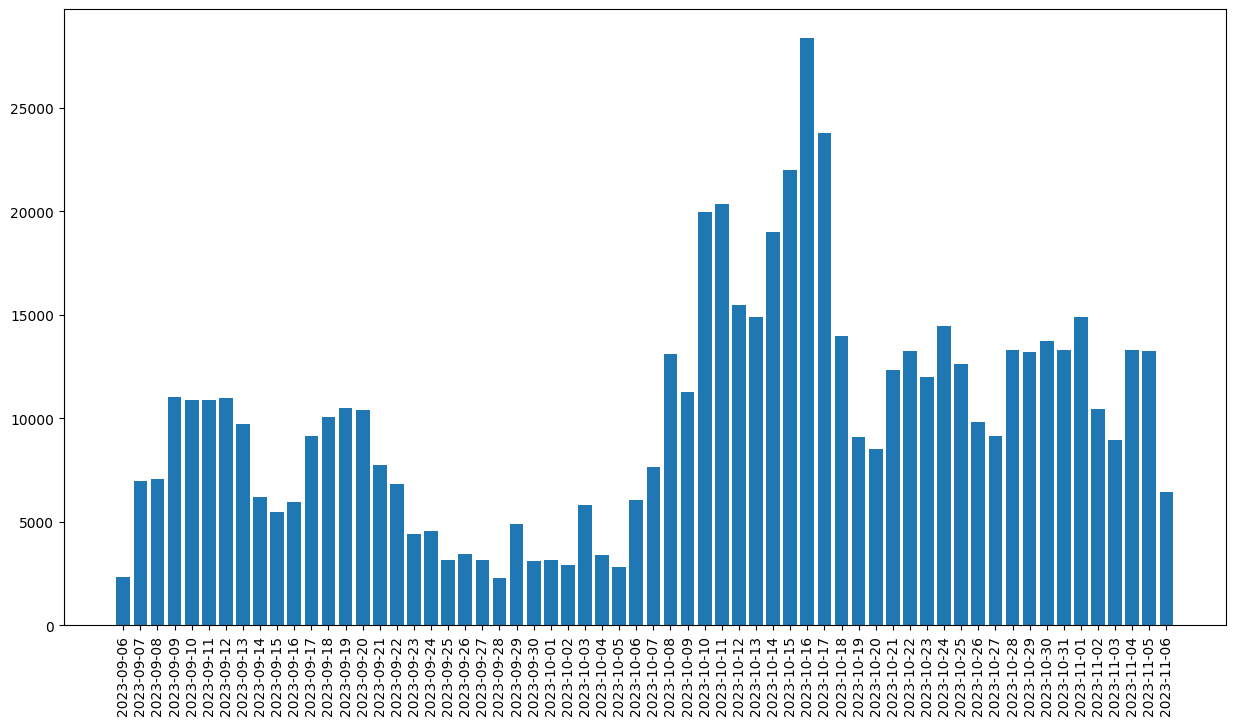

In [ ]:
# p4

from datetime import datetime


timeline = cleaned.map(lambda x: ( datetime.fromtimestamp(x['date_published']).strftime("%Y-%m-%d"), 1)).reduceByKey(lambda x,y : x+y).sortByKey().collect()

counts = [x[1] for x in timeline]
dates = [ x[0] for x in timeline]

plt.figure(figsize=(15, 8))
indices = np.arange(len(timeline))
plt.bar(indices, counts)
plt.xticks(indices, dates, rotation='vertical')
plt.show()

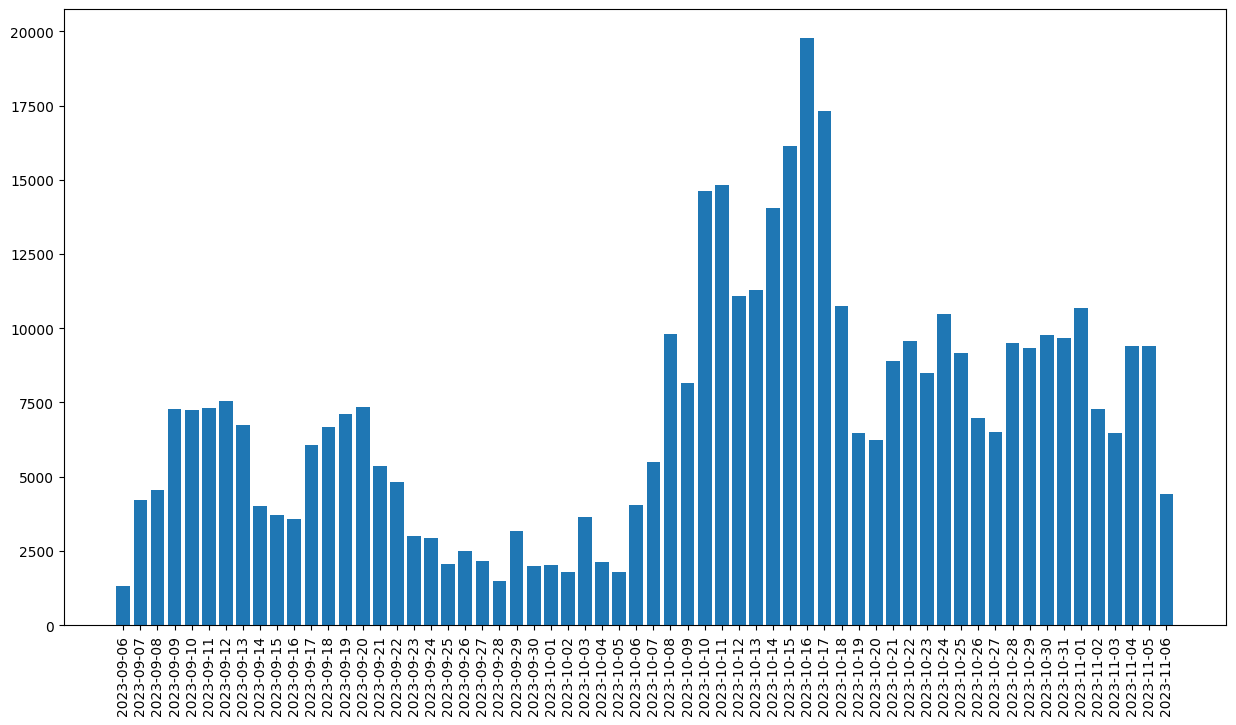

In [ ]:
# p5

def contain(text):
    textS= ngrams(text,3)+ngrams(text,2)
    for w in words :
      if w in textS:
        return True

    return False

timeline2 = cleaned.map(lambda x: (x['body'],datetime.fromtimestamp(x['date_published']).strftime("%Y-%m-%d"))).filter(lambda x : contain(x[0])).map(lambda x: (x[1],1)).reduceByKey(lambda x,y : x+y).sortByKey().collect()

counts = [x[1] for x in timeline2]
dates = [ x[0] for x in timeline2]

plt.figure(figsize=(15, 8))
indices = np.arange(len(timeline2))
plt.bar(indices, counts)
plt.xticks(indices, dates, rotation='vertical')
plt.show()

# Section 4: Son, A-prior algorithm
- In this section we want to find 3-sets words collections that appear together the most.
    - What is your idea to solve the problem?
    - Implement an algorithm for doing so.
    - What is the most pertinant 3-sets words?
- Now we want to test the results and know that how valid is the model.
    - How we can test the model?
    - Explain and implement a scenario to test the model with using `tf-idf`.

In [ ]:
# TODO: find the answers of the above questions.


In last section I used A-prior algorithm to find most frequent keywords. I used keywords as candidate of 2_sets and 3_sets candidate.


3-sets words collections that appear together the most is :

In [ ]:
sets3.top(20)

[(63824, 'جمهوری اسلامی ایران'),
 (52533, 'مجلس شورای اسلامی'),
 (30345, 'وزیر امور خارجه'),
 (29558, 'عملیات طوفان الاقصی'),
 (23309, 'ارتش رژیم صهیونیستی'),
 (23046, 'برنامه هفتم توسعه'),
 (21390, 'دانشگاه علوم پزشکی'),
 (20586, 'سازمان ملل متحد'),
 (19585, 'هزار میلیارد تومان'),
 (19318, 'مقام معظم رهبری'),
 (18248, 'گزارش سایت قطره'),
 (18248, 'سایت قطره نقل'),
 (16751, 'لیگ قهرمانان آسیا'),
 (16491, 'گزارش خبرگزاری فارس'),
 (15951, 'گزارش خبرگزاری مهر'),
 (15855, 'میلیون هزار تومان'),
 (15755, 'گزارش خبرنگار مهر'),
 (15215, 'دستور کار قرار'),
 (14988, 'وزارت امور خارجه'),
 (14621, 'امام خمینی ره')]

# p2
 Since the ratio inside the idf's log function is always greater than or equal to 1, the value of idf (and tf–idf) is greater than or equal to 0. As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing the idf and tf–idf closer to 0.
 so sum(tf-idf of the most frequent 3-sets item in d) must be less than others

In below we calculated tf_idf(t)= ∑tf_idf(t,d), d ∈ D  and t ∈ sets3





In [ ]:
def contain2(text,t):
  textS= ngrams(text,3)
  if t in textS:
    return True
  return False


In [ ]:
N = news_rdd.count()

word_to_check1= shingeled3.top(5)
word_to_check2= shingeled3.take(5)

tfwords =list(set(word_to_check1+ word_to_check2))
for ww, tt in tfwords :
  nt = cleaned.map(lambda x: x['body']).filter(lambda x : contain2(x,tt)).count()
  ft = cleaned.map(lambda x: (x['body'], len(x['body'].split()))).map(lambda x : (ngrams(x[0],3) ,x[1])).map(lambda x : (x[0].count(tt), x[1])).map(lambda x : x[0]/x[1]).sum()
  print(tt , ft* log10(1+ (N/nt)))



مجلس شورای اسلامی 394.06058395619834


وزیر امور خارجه 298.60429174533544


جمهوری اسلامی ایران 395.1347024769405


دفتر سیاسی حماس 38.764648887002295


ارتش رژیم صهیونیستی 222.02261064056975


اسلامی فلسطین حماس 36.10264089079054


عملیات طوفان الاقصی 237.83182059468064


رئیس جمهور ترکیه 37.62711073667745


گزارش اینتیتر نقل 68.11215370826471


هزار میلیارد ریال 101.39806701718568


In [ ]:
tfwords

[(52533, 'مجلس شورای اسلامی'),
 (30345, 'وزیر امور خارجه'),
 (63824, 'جمهوری اسلامی ایران'),
 (2571, 'دفتر سیاسی حماس'),
 (23309, 'ارتش رژیم صهیونیستی'),
 (2685, 'اسلامی فلسطین حماس'),
 (29558, 'عملیات طوفان الاقصی'),
 (2099, 'رئیس جمهور ترکیه'),
 (3462, 'گزارش اینتیتر نقل'),
 (7173, 'هزار میلیارد ریال')]